## Binary classficiation on breast cancer dataset using "Gaussian determinant analysis"

#### Importing required libraries

In [1602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

#### Importing the dataset

In [1603]:
dataset = pd.read_csv('Dataset/breast-cancer.csv')

# Head of the dataset

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1604]:
# Info of dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### EDA

In [1605]:
# Drop duplicate rows if any

dataset = dataset.drop_duplicates()

In [1606]:
dataset.shape

(569, 32)

In [1607]:
# Unique values in target variable

dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

- 'M' - refers to malignant tumors
- 'B' - refers to benign tumors

In [1608]:
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

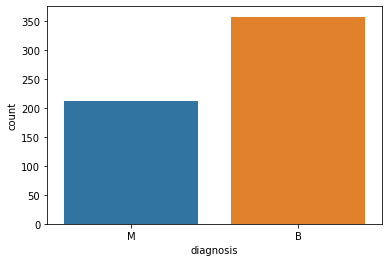

In [1609]:
sns.countplot(data=dataset,x='diagnosis')
plt.show()

- There are more benign tumors than malignant ones in this dataset

#### Distribution of the mean features vs the 'diagnosis' variable

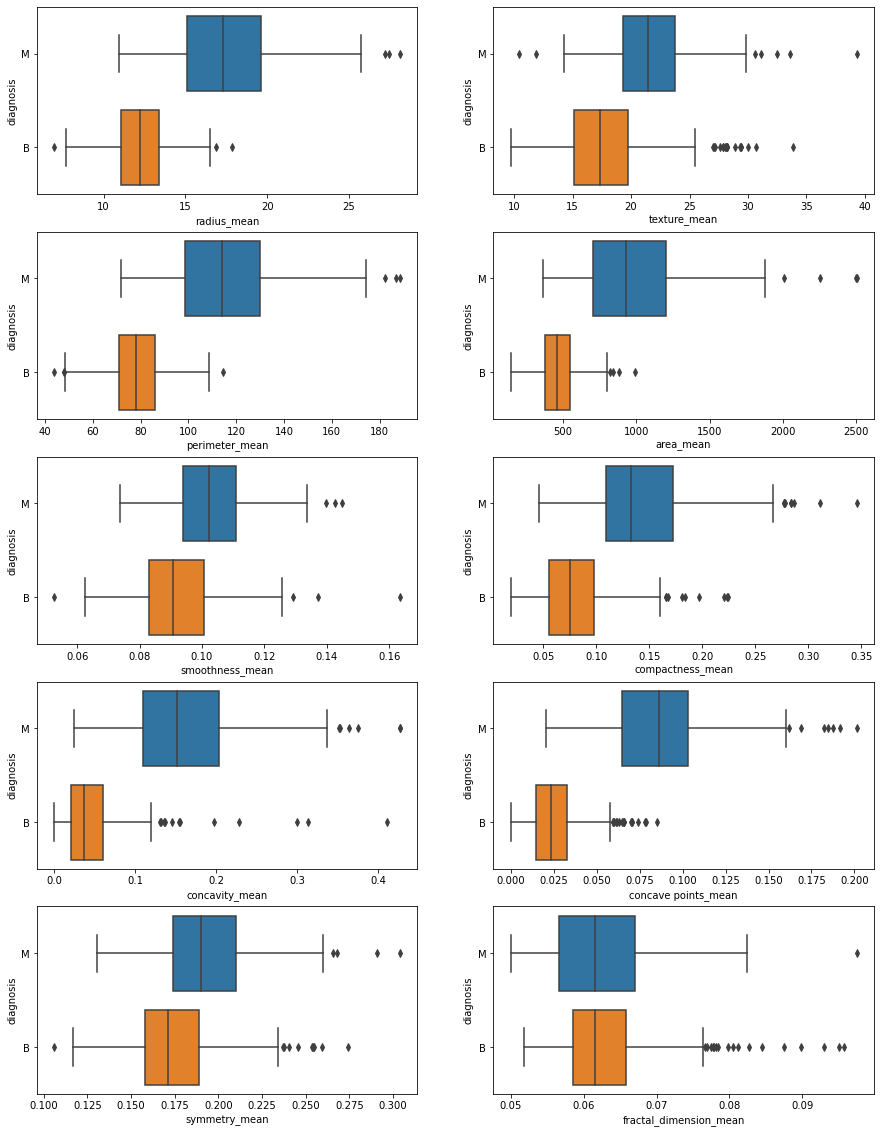

In [1610]:
fig = plt.figure(figsize=(15,20))

ax1 = fig.add_subplot(5,2,1)
sns.boxplot(data=dataset,x='radius_mean',y='diagnosis',ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.boxplot(data=dataset,x='texture_mean',y='diagnosis',ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.boxplot(data=dataset,x='perimeter_mean',y='diagnosis',ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.boxplot(data=dataset,x='area_mean',y='diagnosis',ax=ax4)

ax5 = fig.add_subplot(5,2,5)
sns.boxplot(data=dataset,x='smoothness_mean',y='diagnosis',ax=ax5)

ax6 = fig.add_subplot(5,2,6)
sns.boxplot(data=dataset,x='compactness_mean',y='diagnosis',ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.boxplot(data=dataset,x='concavity_mean',y='diagnosis',ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.boxplot(data=dataset,x='concave points_mean',y='diagnosis',ax=ax8)

ax9 = fig.add_subplot(5,2,9)
sns.boxplot(data=dataset,x='symmetry_mean',y='diagnosis',ax=ax9)

ax10 = fig.add_subplot(5,2,10)
sns.boxplot(data=dataset,x='fractal_dimension_mean',y='diagnosis',ax=ax10)

plt.show()

- <b>radius_mean</b> is more for malignant tumors than benign tumors
- <b>texture_mean</b> is more for malignant tumors than benign tumors
- <b>perimeter_mean</b> is more for malignant tumors than benign tumors
- <b>area_mean</b> is more for malignant tumors than benign tumors
- <b>smoothness_mean</b> is `slightly` more for malignant tumors than benign tumors
- <b>compactness_mean</b> is more for malignant tumors than benign tumors
- <b>concavity_mean</b> is more for malignant tumors than benign tumors
- <b>concave points_mean</b> is more for malignant tumors than benign tumors
- <b>symmetry_mean</b> is more for malignant tumors than benign tumors
- <b>fractal_dimension_mean</b> is `almost same` for malignant tumors and benign tumors

#### Distribution of the se features vs the 'diagnosis' variable

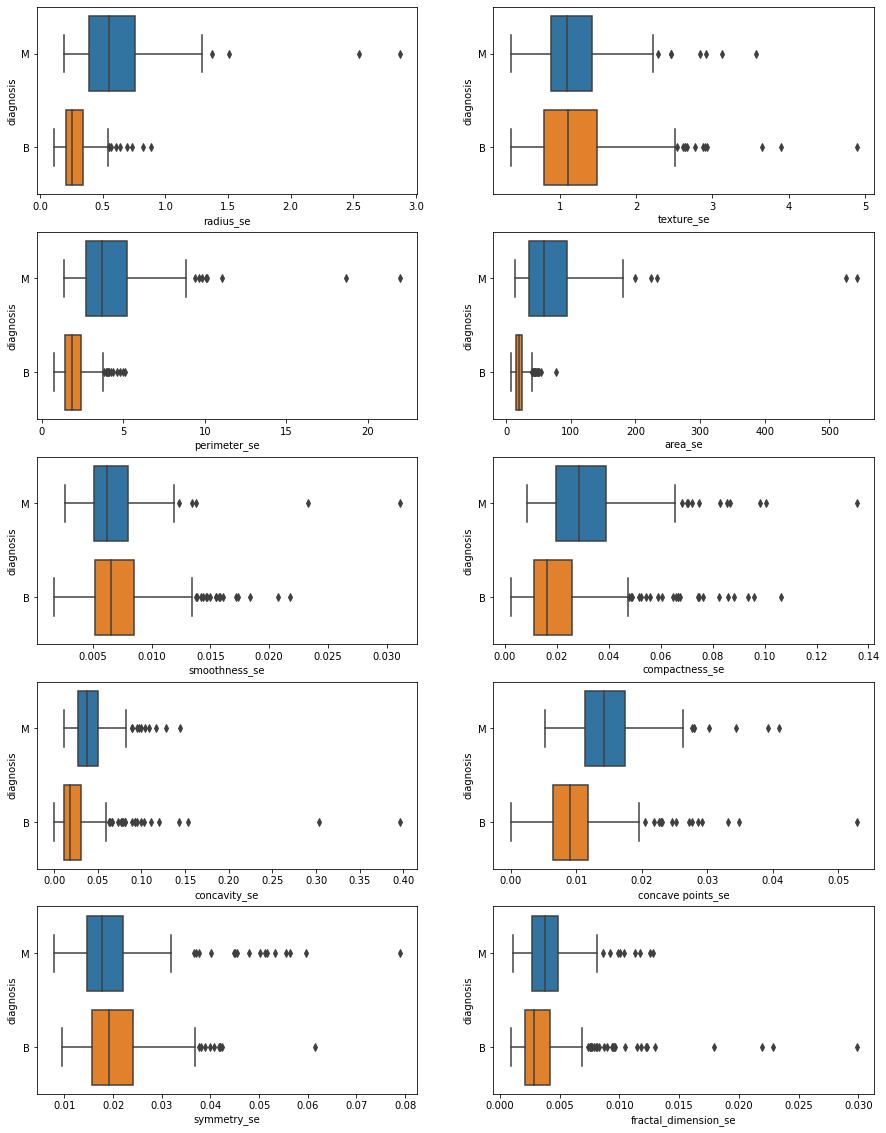

In [1611]:
fig = plt.figure(figsize=(15,20))

ax1 = fig.add_subplot(5,2,1)
sns.boxplot(data=dataset,x='radius_se',y='diagnosis',ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.boxplot(data=dataset,x='texture_se',y='diagnosis',ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.boxplot(data=dataset,x='perimeter_se',y='diagnosis',ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.boxplot(data=dataset,x='area_se',y='diagnosis',ax=ax4)

ax5 = fig.add_subplot(5,2,5)
sns.boxplot(data=dataset,x='smoothness_se',y='diagnosis',ax=ax5)

ax6 = fig.add_subplot(5,2,6)
sns.boxplot(data=dataset,x='compactness_se',y='diagnosis',ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.boxplot(data=dataset,x='concavity_se',y='diagnosis',ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.boxplot(data=dataset,x='concave points_se',y='diagnosis',ax=ax8)

ax9 = fig.add_subplot(5,2,9)
sns.boxplot(data=dataset,x='symmetry_se',y='diagnosis',ax=ax9)

ax10 = fig.add_subplot(5,2,10)
sns.boxplot(data=dataset,x='fractal_dimension_se',y='diagnosis',ax=ax10)

plt.show()

- <b>radius_se</b> is more for malignant tumors than benign tumors
- <b>texture_se</b> is `almost same` for malignant tumors and benign tumors , let us see if this feature can be removed
- <b>perimeter_se</b> is more for malignant tumors than benign tumors
- <b>area_se</b> is more for malignant tumors than benign tumors
- <b>smoothness_se</b> is `almost same` for malignant tumors and benign tumors , let us see if this feature can be removed
- <b>compactness_se</b> is `slightly` more for malignant tumors than benign tumors
- <b>concavity_se</b> is `slightly` more for malignant tumors than benign tumors
- <b>concave points_se</b> is more for malignant tumors than benign tumors
- <b>symmetry_se</b> is `almost same` for malignant tumors and benign tumors , let us see if this feature can be removed
- <b>fractal_dimension_se</b> is `almost same` for malignant tumors and benign tumors , let us see if this feature can be removed

#### Distribution of the worst features vs the 'diagnosis' variable

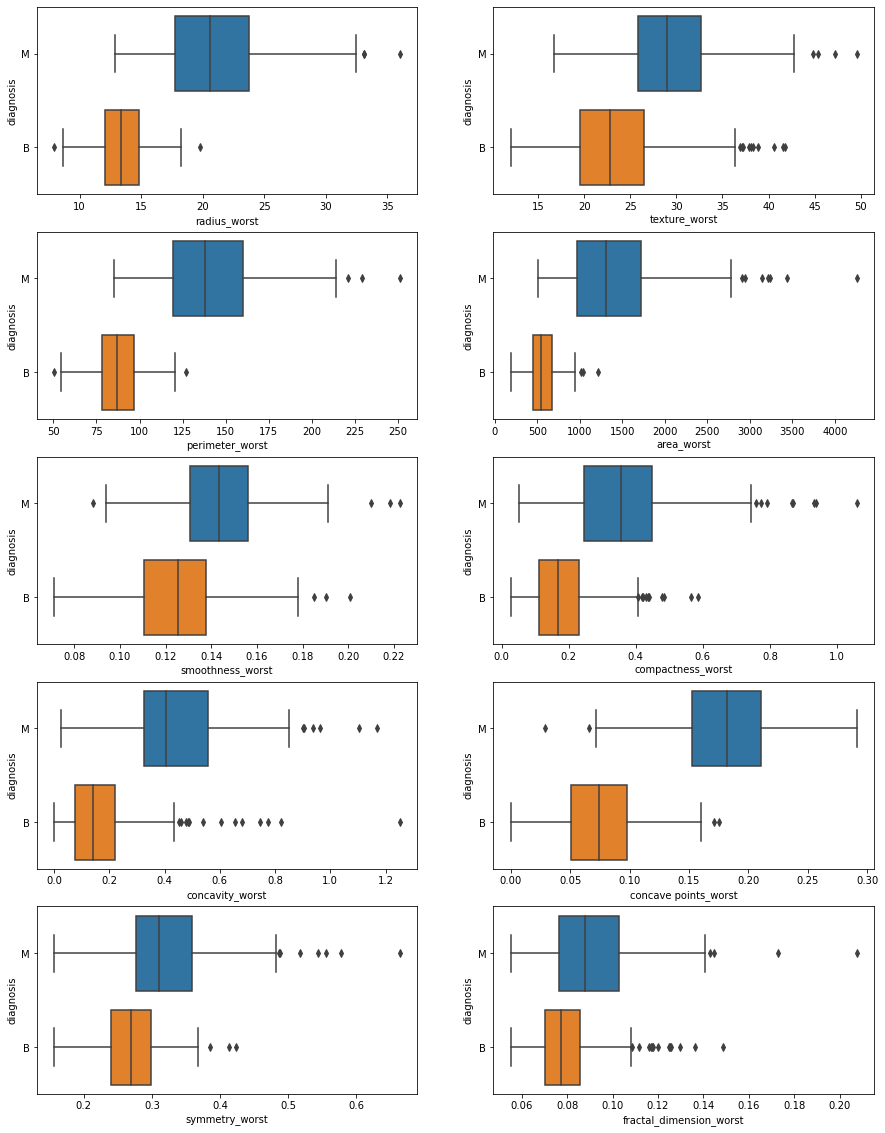

In [1612]:
fig = plt.figure(figsize=(15,20))

ax1 = fig.add_subplot(5,2,1)
sns.boxplot(data=dataset,x='radius_worst',y='diagnosis',ax=ax1)

ax2 = fig.add_subplot(5,2,2)
sns.boxplot(data=dataset,x='texture_worst',y='diagnosis',ax=ax2)

ax3 = fig.add_subplot(5,2,3)
sns.boxplot(data=dataset,x='perimeter_worst',y='diagnosis',ax=ax3)

ax4 = fig.add_subplot(5,2,4)
sns.boxplot(data=dataset,x='area_worst',y='diagnosis',ax=ax4)

ax5 = fig.add_subplot(5,2,5)
sns.boxplot(data=dataset,x='smoothness_worst',y='diagnosis',ax=ax5)

ax6 = fig.add_subplot(5,2,6)
sns.boxplot(data=dataset,x='compactness_worst',y='diagnosis',ax=ax6)

ax7 = fig.add_subplot(5,2,7)
sns.boxplot(data=dataset,x='concavity_worst',y='diagnosis',ax=ax7)

ax8 = fig.add_subplot(5,2,8)
sns.boxplot(data=dataset,x='concave points_worst',y='diagnosis',ax=ax8)

ax9 = fig.add_subplot(5,2,9)
sns.boxplot(data=dataset,x='symmetry_worst',y='diagnosis',ax=ax9)

ax10 = fig.add_subplot(5,2,10)
sns.boxplot(data=dataset,x='fractal_dimension_worst',y='diagnosis',ax=ax10)

plt.show()

- <b>radius_worst</b> is more for malignant tumors than benign tumors
- <b>texture_worst</b> is more for malignant tumors than benign tumors
- <b>perimeter_worst</b> is more for malignant tumors than benign tumors
- <b>area_worst</b> is more for malignant tumors than benign tumors
- <b>smoothness_worst</b> is more for malignant tumors than benign tumors
- <b>compactness_worst</b> is more for malignant tumors than benign tumors
- <b>concavity_worst</b> is more for malignant tumors than benign tumors
- <b>concave points_worst</b> is more for malignant tumors than benign tumors
- <b>symmetry_worst</b> is more for malignant tumors than benign tumorss
- <b>fractal_dimension_worst</b> is more for malignant tumors than benign tumors

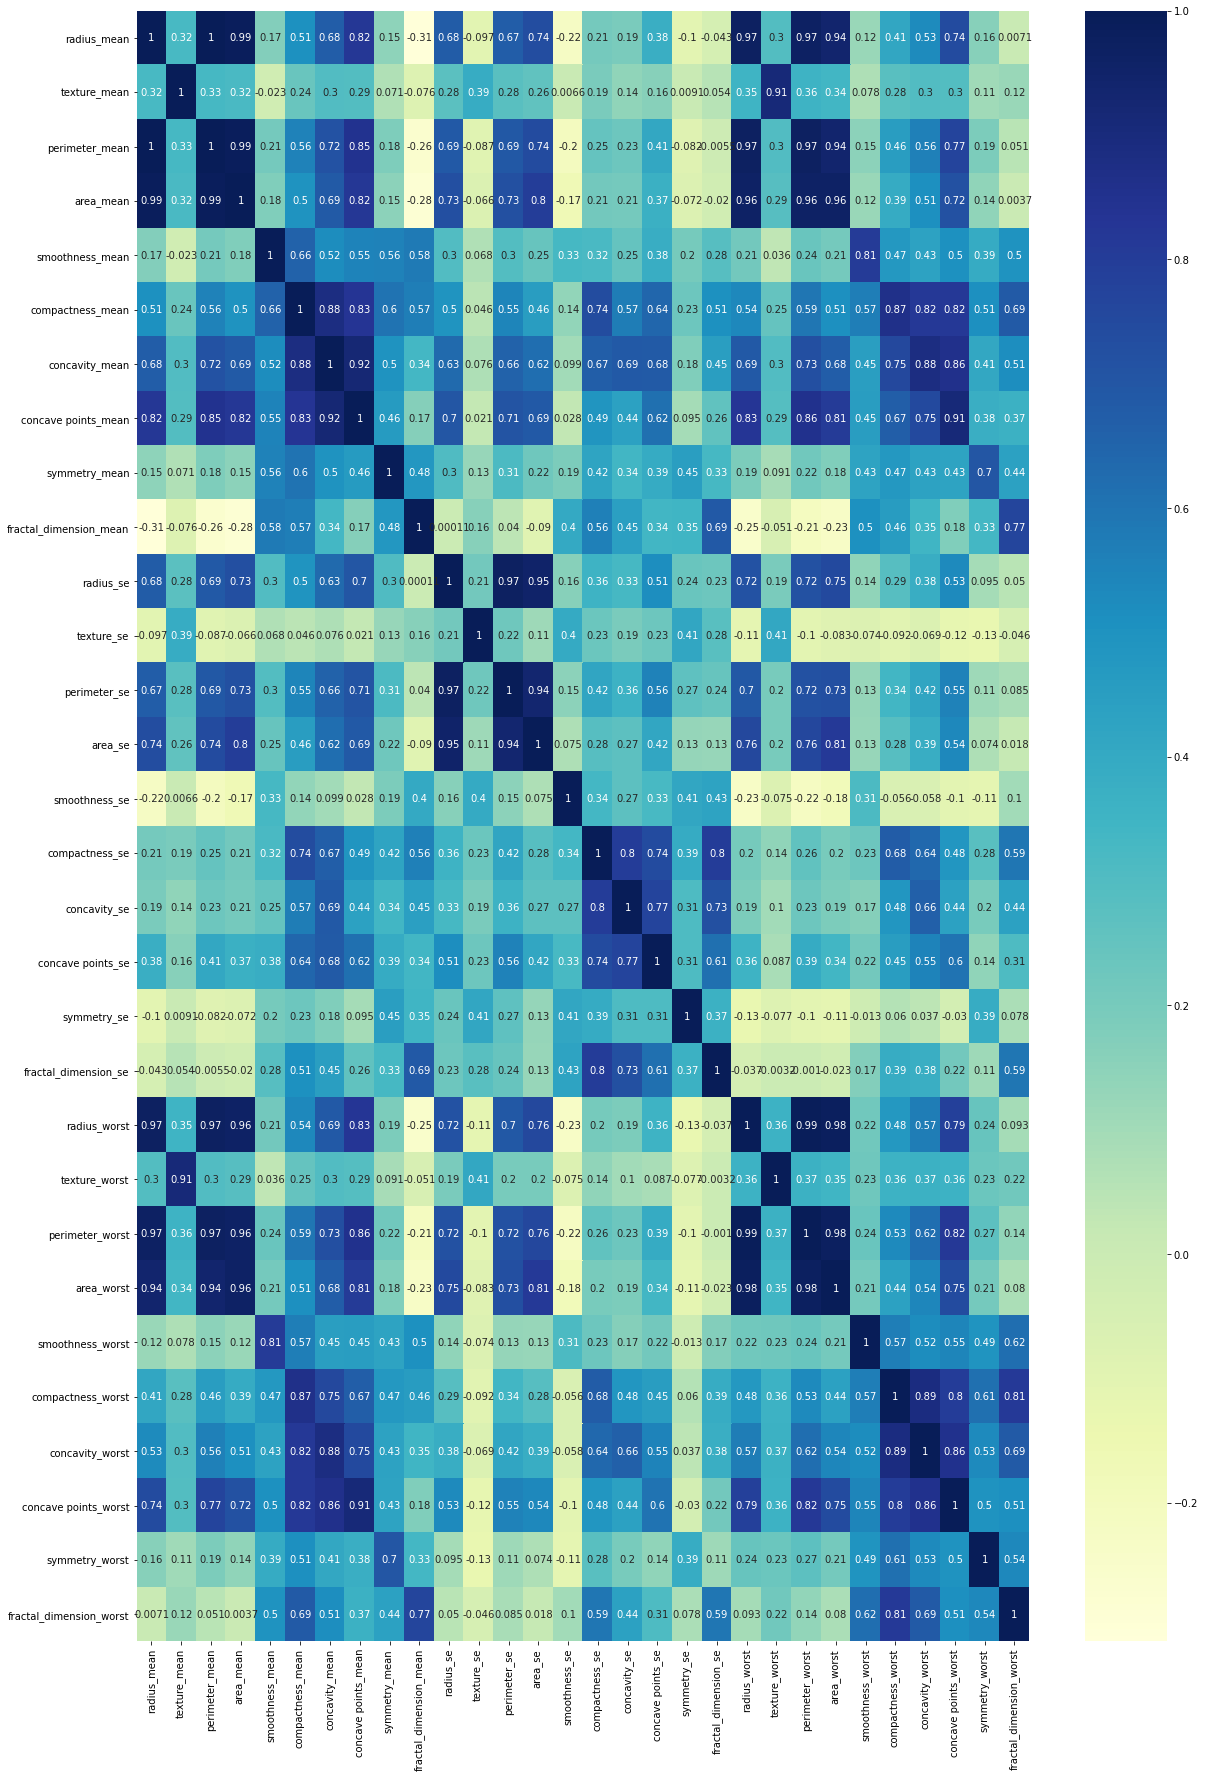

In [1613]:
heatmap_data = dataset.copy()
heatmap_data = heatmap_data.drop(['id','diagnosis'],axis=1)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(30)
sns.heatmap(heatmap_data.corr(),annot=True,cmap='YlGnBu')
plt.show()

#### A function which prints all the correlated columns for a given column

In [1614]:
def print_correlated_columns(row):
    df = heatmap_data.corr()
    all_cols = list(df.columns)
    
    for col in all_cols:
        if col != row:
            corr_val = df[row][col]
            
            if((abs(corr_val) >= 0.7)):
                print("{0} is correlated to {1} by a value of {2}".format(row,col,corr_val)) 

In [1615]:
# Print all the columns correlated to radius_mean

print_correlated_columns('radius_mean')    

radius_mean is correlated to perimeter_mean by a value of 0.9978552814938113
radius_mean is correlated to area_mean by a value of 0.9873571700566119
radius_mean is correlated to concave points_mean by a value of 0.8225285223871791
radius_mean is correlated to area_se by a value of 0.7358636632128175
radius_mean is correlated to radius_worst by a value of 0.9695389726112053
radius_mean is correlated to perimeter_worst by a value of 0.9651365139559878
radius_mean is correlated to area_worst by a value of 0.9410824595860459
radius_mean is correlated to concave points_worst by a value of 0.7442141978674656


In [1616]:
# Print all the columns correlated to texture_mean

print_correlated_columns('texture_mean')  

texture_mean is correlated to texture_worst by a value of 0.9120445888404215


In [1617]:
# Print all the columns correlated to perimeter_mean

print_correlated_columns('perimeter_mean')  

perimeter_mean is correlated to radius_mean by a value of 0.9978552814938113
perimeter_mean is correlated to area_mean by a value of 0.9865068039913906
perimeter_mean is correlated to concavity_mean by a value of 0.7161356501174044
perimeter_mean is correlated to concave points_mean by a value of 0.8509770412528199
perimeter_mean is correlated to area_se by a value of 0.7449826941190679
perimeter_mean is correlated to radius_worst by a value of 0.9694763634663142
perimeter_mean is correlated to perimeter_worst by a value of 0.9703868870426388
perimeter_mean is correlated to area_worst by a value of 0.9415498080023057
perimeter_mean is correlated to concave points_worst by a value of 0.7712407893605479


In [1618]:
# Print all the columns correlated to area_mean

print_correlated_columns('area_mean')  

area_mean is correlated to radius_mean by a value of 0.9873571700566119
area_mean is correlated to perimeter_mean by a value of 0.9865068039913906
area_mean is correlated to concave points_mean by a value of 0.823268868652435
area_mean is correlated to radius_se by a value of 0.7325622269972976
area_mean is correlated to perimeter_se by a value of 0.7266283277906854
area_mean is correlated to area_se by a value of 0.8000859212343217
area_mean is correlated to radius_worst by a value of 0.9627460860470841
area_mean is correlated to perimeter_worst by a value of 0.959119574355266
area_mean is correlated to area_worst by a value of 0.9592133256499006
area_mean is correlated to concave points_worst by a value of 0.722016626260358


In [1619]:
# Print all the columns correlated to smoothness_mean

print_correlated_columns('smoothness_mean')  

smoothness_mean is correlated to smoothness_worst by a value of 0.8053241954943631


In [1620]:
# Print all the columns correlated to compactness_mean

print_correlated_columns('compactness_mean')

compactness_mean is correlated to concavity_mean by a value of 0.8831206701772499
compactness_mean is correlated to concave points_mean by a value of 0.8311350431336992
compactness_mean is correlated to compactness_se by a value of 0.7387217896603926
compactness_mean is correlated to compactness_worst by a value of 0.8658090398022638
compactness_mean is correlated to concavity_worst by a value of 0.8162752498000281
compactness_mean is correlated to concave points_worst by a value of 0.8155732235690654


In [1621]:
# Print all the columns correlated to concavity_mean

print_correlated_columns('concavity_mean')

concavity_mean is correlated to perimeter_mean by a value of 0.7161356501174044
concavity_mean is correlated to compactness_mean by a value of 0.8831206701772499
concavity_mean is correlated to concave points_mean by a value of 0.9213910263788594
concavity_mean is correlated to perimeter_worst by a value of 0.7295649165132022
concavity_mean is correlated to compactness_worst by a value of 0.7549680159063971
concavity_mean is correlated to concavity_worst by a value of 0.8841026390943831
concavity_mean is correlated to concave points_worst by a value of 0.8613230336379504


In [1622]:
# Print all the columns correlated to concave points_mean

print_correlated_columns('concave points_mean')

concave points_mean is correlated to radius_mean by a value of 0.8225285223871791
concave points_mean is correlated to perimeter_mean by a value of 0.8509770412528199
concave points_mean is correlated to area_mean by a value of 0.823268868652435
concave points_mean is correlated to compactness_mean by a value of 0.8311350431336992
concave points_mean is correlated to concavity_mean by a value of 0.9213910263788594
concave points_mean is correlated to perimeter_se by a value of 0.710649871613899
concave points_mean is correlated to radius_worst by a value of 0.8303176311186149
concave points_mean is correlated to perimeter_worst by a value of 0.8559231281343112
concave points_mean is correlated to area_worst by a value of 0.8096296199096177
concave points_mean is correlated to concavity_worst by a value of 0.7523994975749646
concave points_mean is correlated to concave points_worst by a value of 0.9101553142985934


In [1623]:
# Print all the columns correlated to symmetry_mean

print_correlated_columns('symmetry_mean')

In [1624]:
# Print all the columns correlated to fractal_dimension_mean

print_correlated_columns('fractal_dimension_mean')

fractal_dimension_mean is correlated to fractal_dimension_worst by a value of 0.7672967792384351


In [1625]:
# Print all the columns correlated to radius_se

print_correlated_columns('radius_se')

radius_se is correlated to area_mean by a value of 0.7325622269972976
radius_se is correlated to perimeter_se by a value of 0.9727936770160752
radius_se is correlated to area_se by a value of 0.95183011211099
radius_se is correlated to radius_worst by a value of 0.7150651951351847
radius_se is correlated to perimeter_worst by a value of 0.7196838036650056
radius_se is correlated to area_worst by a value of 0.7515484761266196


In [1626]:
# Print all the columns correlated to texture_se 

print_correlated_columns('texture_se')

In [1627]:
# Print all the columns correlated to perimeter_se 

print_correlated_columns('perimeter_se')

perimeter_se is correlated to area_mean by a value of 0.7266283277906854
perimeter_se is correlated to concave points_mean by a value of 0.710649871613899
perimeter_se is correlated to radius_se by a value of 0.9727936770160752
perimeter_se is correlated to area_se by a value of 0.9376554069544158
perimeter_se is correlated to perimeter_worst by a value of 0.7210313099890179
perimeter_se is correlated to area_worst by a value of 0.7307129731302835


In [1628]:
# Print all the columns correlated to area_se 

print_correlated_columns('area_se')

area_se is correlated to radius_mean by a value of 0.7358636632128175
area_se is correlated to perimeter_mean by a value of 0.7449826941190679
area_se is correlated to area_mean by a value of 0.8000859212343217
area_se is correlated to radius_se by a value of 0.95183011211099
area_se is correlated to perimeter_se by a value of 0.9376554069544158
area_se is correlated to radius_worst by a value of 0.7573731889240161
area_se is correlated to perimeter_worst by a value of 0.761212636068759
area_se is correlated to area_worst by a value of 0.8114079609317285


In [1629]:
# Print all the columns correlated to smoothness_se

print_correlated_columns('smoothness_se')

In [1630]:
# Print all the columns correlated to compactness_se

print_correlated_columns('compactness_se')

compactness_se is correlated to compactness_mean by a value of 0.7387217896603926
compactness_se is correlated to concavity_se by a value of 0.8012683427383301
compactness_se is correlated to concave points_se by a value of 0.7440826676953249
compactness_se is correlated to fractal_dimension_se by a value of 0.8032688176617685


In [1631]:
# Print all the columns correlated to concavity_se

print_correlated_columns('concavity_se')

concavity_se is correlated to compactness_se by a value of 0.8012683427383301
concavity_se is correlated to concave points_se by a value of 0.771803994923847
concavity_se is correlated to fractal_dimension_se by a value of 0.7273721838811942


In [1632]:
# Print all the columns correlated to concave points_se

print_correlated_columns('concave points_se')

concave points_se is correlated to compactness_se by a value of 0.7440826676953249
concave points_se is correlated to concavity_se by a value of 0.771803994923847


In [1633]:
# Print all the columns correlated to symmetry_se

print_correlated_columns('symmetry_se')

In [1634]:
# Print all the columns correlated to fractal_dimension_se

print_correlated_columns('fractal_dimension_se')

fractal_dimension_se is correlated to compactness_se by a value of 0.8032688176617685
fractal_dimension_se is correlated to concavity_se by a value of 0.7273721838811942


In [1635]:
# Print all the columns correlated to radius_worst

print_correlated_columns('radius_worst')

radius_worst is correlated to radius_mean by a value of 0.9695389726112053
radius_worst is correlated to perimeter_mean by a value of 0.9694763634663142
radius_worst is correlated to area_mean by a value of 0.9627460860470841
radius_worst is correlated to concave points_mean by a value of 0.8303176311186149
radius_worst is correlated to radius_se by a value of 0.7150651951351847
radius_worst is correlated to area_se by a value of 0.7573731889240161
radius_worst is correlated to perimeter_worst by a value of 0.993707916102951
radius_worst is correlated to area_worst by a value of 0.9840145644590724
radius_worst is correlated to concave points_worst by a value of 0.7874238517122413


In [1636]:
# Print all the columns correlated to texture_worst

print_correlated_columns('texture_worst')

texture_worst is correlated to texture_mean by a value of 0.9120445888404215


In [1637]:
# Print all the columns correlated to perimeter_worst

print_correlated_columns('perimeter_worst')

perimeter_worst is correlated to radius_mean by a value of 0.9651365139559878
perimeter_worst is correlated to perimeter_mean by a value of 0.9703868870426388
perimeter_worst is correlated to area_mean by a value of 0.959119574355266
perimeter_worst is correlated to concavity_mean by a value of 0.7295649165132022
perimeter_worst is correlated to concave points_mean by a value of 0.8559231281343112
perimeter_worst is correlated to radius_se by a value of 0.7196838036650056
perimeter_worst is correlated to perimeter_se by a value of 0.7210313099890179
perimeter_worst is correlated to area_se by a value of 0.761212636068759
perimeter_worst is correlated to radius_worst by a value of 0.993707916102951
perimeter_worst is correlated to area_worst by a value of 0.9775780914063881
perimeter_worst is correlated to concave points_worst by a value of 0.8163221016875445


In [1638]:
# Print all the columns correlated to area_worst

print_correlated_columns('area_worst')

area_worst is correlated to radius_mean by a value of 0.9410824595860459
area_worst is correlated to perimeter_mean by a value of 0.9415498080023057
area_worst is correlated to area_mean by a value of 0.9592133256499006
area_worst is correlated to concave points_mean by a value of 0.8096296199096177
area_worst is correlated to radius_se by a value of 0.7515484761266196
area_worst is correlated to perimeter_se by a value of 0.7307129731302835
area_worst is correlated to area_se by a value of 0.8114079609317285
area_worst is correlated to radius_worst by a value of 0.9840145644590724
area_worst is correlated to perimeter_worst by a value of 0.9775780914063881
area_worst is correlated to concave points_worst by a value of 0.7474188023228173


In [1639]:
# Print all the columns correlated to smoothness_worst

print_correlated_columns('smoothness_worst')

smoothness_worst is correlated to smoothness_mean by a value of 0.8053241954943631


In [1640]:
# Print all the columns correlated to compactness_worst

print_correlated_columns('compactness_worst')

compactness_worst is correlated to compactness_mean by a value of 0.8658090398022638
compactness_worst is correlated to concavity_mean by a value of 0.7549680159063971
compactness_worst is correlated to concavity_worst by a value of 0.8922608987764692
compactness_worst is correlated to concave points_worst by a value of 0.801080364635253
compactness_worst is correlated to fractal_dimension_worst by a value of 0.8104548563116136


In [1641]:
# Print all the columns correlated to concavity_worst

print_correlated_columns('concavity_worst')

concavity_worst is correlated to compactness_mean by a value of 0.8162752498000281
concavity_worst is correlated to concavity_mean by a value of 0.8841026390943831
concavity_worst is correlated to concave points_mean by a value of 0.7523994975749646
concavity_worst is correlated to compactness_worst by a value of 0.8922608987764692
concavity_worst is correlated to concave points_worst by a value of 0.8554338603439984


In [1642]:
# Print all the columns correlated to concave points_worst

print_correlated_columns('concave points_worst')

concave points_worst is correlated to radius_mean by a value of 0.7442141978674656
concave points_worst is correlated to perimeter_mean by a value of 0.7712407893605479
concave points_worst is correlated to area_mean by a value of 0.722016626260358
concave points_worst is correlated to compactness_mean by a value of 0.8155732235690654
concave points_worst is correlated to concavity_mean by a value of 0.8613230336379504
concave points_worst is correlated to concave points_mean by a value of 0.9101553142985934
concave points_worst is correlated to radius_worst by a value of 0.7874238517122413
concave points_worst is correlated to perimeter_worst by a value of 0.8163221016875445
concave points_worst is correlated to area_worst by a value of 0.7474188023228173
concave points_worst is correlated to compactness_worst by a value of 0.801080364635253
concave points_worst is correlated to concavity_worst by a value of 0.8554338603439984


In [1643]:
# Print all the columns correlated to symmetry_worst

print_correlated_columns('symmetry_worst')

In [1644]:
# Print all the columns correlated to fractal_dimension_worst

print_correlated_columns('fractal_dimension_worst')

fractal_dimension_worst is correlated to fractal_dimension_mean by a value of 0.7672967792384351
fractal_dimension_worst is correlated to compactness_worst by a value of 0.8104548563116136


#### Correlation findings conclusion

- radius_mean , perimeter_mean, area_mean , concave points_mean features are very much correlated to each other. We will likely retain only one of the columns.
- radius_mean is highly correlated to radius_worst,perimeter_worst, area_worst , concave points_worst.
- texture_mean is highly correlated to texture_worst
- perimeter_mean is highly correlated to perimeter_worst
- In short All radius features are heavily correlated as well
- In short All perimeter features are heavily correlated as well
- In short All area features are heavily correlated as well
- fractal_dimension_worst is highly correlated to compactness_worst
- fractal_dimension_worst is highly correlated to fractal_dimension_mean
- concave points_worst is highly correlated to a number of columns. Do we require this column?
- radius,perimeter,area columns are highly correlated to one another.
- We have a dataset with very highly correlated features

In [1645]:
# Statistical summary of all numerical columns in the data set

dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [1646]:
# Checks if there are missing values

dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

- Looks like <b>area</b> columns have outliers and we might have to remove such rows and possibly other outliers will be removed as well
- There are no missing values in the dataset as well

#### Splitting data into train and test

In [1647]:
data_train , data_test = train_test_split(dataset,test_size=0.2,random_state=101)

In [1648]:
# Train head

data_train.shape

(455, 32)

In [1649]:
# Test head

data_test.shape

(114, 32)

In [1650]:
# Split the dependent and independent variable

X_train = data_train.copy()
Y_train = pd.DataFrame(X_train['diagnosis'],columns=['diagnosis'])
X_train = X_train.drop('diagnosis',axis=1)

In [1651]:
X_train.shape

(455, 31)

In [1652]:
Y_train['diagnosis'].value_counts()

B    285
M    170
Name: diagnosis, dtype: int64

In [1653]:
Y_train.head()

,diagnosis
476,B
130,B
246,B
205,M
16,M


In [1654]:
X_train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
476,911654,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,0.3478,1.0180,2.749,31.01,0.004107,0.03288,0.02821,0.013500,0.01610,0.002744,16.45,27.26,112.10,828.5,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858
130,866714,12.19,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,0.1880,0.06471,0.2005,0.8163,1.973,15.24,0.006773,0.02456,0.01018,0.008094,0.02662,0.004143,13.34,17.81,91.38,545.2,0.1427,0.2585,0.09915,0.08187,0.3469,0.09241
246,884448,13.20,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.01105,0.1487,0.05635,0.1630,1.6010,0.873,13.56,0.006261,0.01569,0.03079,0.005383,0.01962,0.002250,13.94,27.82,88.28,602.0,0.1101,0.1508,0.22980,0.04970,0.2767,0.07198
205,879523,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,0.2711,0.3621,1.974,26.44,0.005472,0.01919,0.02039,0.008260,0.01523,0.002881,17.77,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740
16,848406,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,0.4727,1.2400,3.195,45.40,0.005718,0.01162,0.01998,0.011090,0.01410,0.002085,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216


In [1655]:
# Split the dependent and independent variable

X_test = data_test.copy()
Y_test = pd.DataFrame(X_test['diagnosis'],columns=['diagnosis'])
X_test.drop('diagnosis',inplace=True,axis=1)

In [1656]:
X_test.shape

(114, 31)

In [1657]:
Y_test.shape

(114, 1)

In [1658]:
X_train.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,455.000000,455.000000,455.00000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.064993e+07,14.124288,19.307560,91.93967,656.671429,0.096368,0.104422,0.089133,0.048828,0.181880,0.062973,0.401258,1.215948,2.829990,40.236912,0.006970,0.025347,0.032097,0.011698,0.020358,0.003787,16.263349,25.788615,107.198791,883.610110,0.132334,0.255079,0.273968,0.115016,0.291143,0.084470
std,1.263882e+08,3.626241,4.284646,24.92217,363.880338,0.014150,0.052310,0.080487,0.038941,0.027653,0.007214,0.285379,0.549482,2.053705,48.173894,0.002922,0.017789,0.031555,0.005999,0.008340,0.002608,4.955826,6.161780,34.263329,588.111471,0.022417,0.155025,0.210371,0.065850,0.063012,0.018265
min,8.670000e+03,6.981000,9.710000,43.79000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.362100,0.757000,7.228000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.698110e+05,11.605000,16.155000,74.68500,409.250000,0.086210,0.066495,0.029320,0.020340,0.163050,0.057985,0.228550,0.832400,1.599500,17.625000,0.005000,0.012745,0.015095,0.007631,0.014890,0.002238,12.835000,21.185000,83.590000,504.300000,0.116950,0.147500,0.114450,0.065225,0.251000,0.072400
50%,9.071450e+05,13.400000,18.900000,86.87000,551.100000,0.095940,0.095090,0.061810,0.033260,0.179700,0.061830,0.313200,1.127000,2.244000,23.920000,0.006248,0.020250,0.025720,0.010870,0.018520,0.003204,14.960000,25.410000,97.670000,686.500000,0.131400,0.215800,0.226000,0.099750,0.283400,0.080320
75%,8.812831e+06,15.815000,21.805000,103.95000,785.600000,0.105100,0.130400,0.130000,0.073820,0.196300,0.066395,0.473500,1.473500,3.275000,44.690000,0.008135,0.032130,0.042440,0.014620,0.023430,0.004536,18.775000,29.880000,125.250000,1079.000000,0.146000,0.338500,0.381900,0.161350,0.318150,0.092460
max,9.113205e+08,28.110000,39.280000,188.50000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.023330,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [1659]:
X_train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
476,911654,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,0.3478,1.0180,2.749,31.01,0.004107,0.03288,0.02821,0.013500,0.01610,0.002744,16.45,27.26,112.10,828.5,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858
130,866714,12.19,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,0.1880,0.06471,0.2005,0.8163,1.973,15.24,0.006773,0.02456,0.01018,0.008094,0.02662,0.004143,13.34,17.81,91.38,545.2,0.1427,0.2585,0.09915,0.08187,0.3469,0.09241
246,884448,13.20,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.01105,0.1487,0.05635,0.1630,1.6010,0.873,13.56,0.006261,0.01569,0.03079,0.005383,0.01962,0.002250,13.94,27.82,88.28,602.0,0.1101,0.1508,0.22980,0.04970,0.2767,0.07198
205,879523,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,0.2711,0.3621,1.974,26.44,0.005472,0.01919,0.02039,0.008260,0.01523,0.002881,17.77,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740
16,848406,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,0.4727,1.2400,3.195,45.40,0.005718,0.01162,0.01998,0.011090,0.01410,0.002085,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216


In [1660]:
X_train.drop(columns='id',inplace=True,axis=1)
X_test.drop(columns='id',inplace=True,axis=1)

#### Standardizing the data

In [1661]:
scaler = StandardScaler()

# Fit and transform train data

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)

# Only transform test data

X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

In [1662]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
476,0.020902,0.285621,0.018893,-0.105292,-0.499345,0.122069,-0.478905,-0.469135,-1.132405,-0.400089,-0.187529,-0.360641,-0.039479,-0.191744,-0.981102,0.423939,-0.123311,0.300681,-0.511165,-0.400355,0.037704,0.239055,0.143203,-0.093810,-0.760713,0.567122,-0.108348,0.287084,-0.599638,-0.322858
130,-0.534001,-1.405993,-0.516561,-0.552634,0.723925,-0.178584,-0.753538,-0.514382,0.221538,0.241075,-0.704254,-0.728118,-0.417749,-0.519460,-0.067583,-0.044269,-0.695326,-0.601488,0.751665,0.136697,-0.590531,-1.296281,-0.462191,-0.576052,0.462929,0.022095,-0.831915,-0.503921,0.885839,0.435180
246,-0.255169,-0.438689,-0.313707,-0.316582,-1.713417,-1.132600,-0.569330,-0.971218,-1.201188,-0.919127,-0.835803,0.701525,-0.953956,-0.554372,-0.243023,-0.543428,-0.041458,-1.053907,-0.088621,-0.589993,-0.469328,0.330038,-0.552766,-0.479365,-0.992937,-0.673395,-0.210185,-0.992996,-0.229460,-0.684612
205,0.274887,-0.613925,0.274770,0.164874,-0.538258,-0.163466,-0.169570,-0.206654,-0.813830,-0.432009,-0.456591,-1.555624,-0.417261,-0.286713,-0.513378,-0.346465,-0.371406,-0.573785,-0.615601,-0.347763,0.304351,-0.901480,0.306823,0.180249,0.748743,0.503836,0.279489,0.154819,0.800047,0.708688
16,0.153416,0.192162,0.112487,0.076561,0.162876,-0.620474,-0.188849,0.096704,-0.842791,-0.520828,0.250617,0.043820,0.177928,0.107294,-0.429084,-0.772467,-0.384414,-0.101507,-0.751247,-0.653334,0.566957,0.827194,0.473364,0.433030,0.628165,-0.438982,0.082953,0.697561,0.186791,-0.126634


In [1663]:
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
107,-0.487069,-0.179339,-0.519373,-0.522646,-0.820551,-0.694155,-0.779906,-0.761438,-0.784869,-0.320985,-0.986996,-0.585828,-0.965947,-0.644416,-1.203828,-0.837183,-0.648055,-1.024703,-0.942113,-0.933184,-0.600631,0.276423,-0.632239,-0.577924,-0.622272,-0.379572,-0.381976,-0.465153,0.113709,-0.691738
437,-0.023269,-0.777479,-0.086752,-0.125100,-0.833993,-0.870222,-0.669083,-0.498443,-0.379410,-0.554135,-0.042299,-0.309628,-0.090663,-0.155793,0.344632,-0.697621,-0.508144,-0.442615,-0.037004,-0.367341,-0.121880,-0.683771,-0.175272,-0.227435,-0.573148,-0.838711,-0.772192,-0.615509,-0.296188,-0.664880
195,-0.335230,-0.695702,-0.377978,-0.385912,-1.199771,-0.971460,-0.626918,-0.644209,0.036910,-0.874717,-0.726354,-0.559957,-0.651730,-0.508862,-0.573000,-0.533298,-0.281940,-0.547084,-0.219466,-0.627614,-0.481448,-0.615534,-0.478845,-0.481748,-1.010801,-0.674687,-0.464302,-0.496623,0.178847,-0.821092
141,0.548198,-0.293827,0.528638,0.430088,0.059581,0.177569,0.066381,0.272548,0.152755,-0.068405,1.065168,0.211435,0.830151,0.703293,-0.068611,-0.335773,-0.045265,-0.004715,-0.193057,-0.135476,0.738661,-0.084259,0.636984,0.594742,-0.041712,-0.203278,0.029655,0.100089,-0.189742,-0.158425
319,-0.467744,-0.539158,-0.535842,-0.493483,-1.471452,-1.337374,-0.941726,-0.818511,-1.255491,-1.021824,-0.082290,1.792842,-0.167194,-0.188627,0.132528,-0.819175,-0.702338,-0.083150,1.677181,-0.317053,-0.679413,-0.906354,-0.743267,-0.625927,-2.154504,-1.342926,-1.197291,-1.318033,-1.605314,-1.378522


#### Handling outliers

In [1664]:
# Before outlier treatment

X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-3.476157e-16,6.689399e-16,-2.223496e-16,-1.427430e-17,-3.650926e-16,-1.004691e-16,6.893143e-17,-2.159445e-17,-1.159024e-17,6.839462e-16,-1.414009e-16,1.123948e-16,9.516197e-18,1.279807e-16,-1.102293e-16,1.551262e-16,1.300547e-16,-7.649559e-17,3.531973e-16,2.013004e-16,4.705028e-16,2.333375e-16,-3.448402e-16,1.262726e-16,5.820741e-16,-5.326173e-17,1.328608e-16,4.697097e-18,-9.743732e-16,-4.741018e-16
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-1.972056e+00,-2.242455e+00,-1.934128e+00,-1.411828e+00,-3.094460e+00,-1.627501e+00,-1.108645e+00,-1.255294e+00,-2.747000e+00,-1.805931e+00,-1.016463e+00,-1.555624e+00,-1.010501e+00,-6.859575e-01,-1.801420e+00,-1.299651e+00,-1.018295e+00,-1.952238e+00,-1.497662e+00,-1.110231e+00,-1.683377e+00,-2.236979e+00,-1.659246e+00,-1.188854e+00,-2.731491e+00,-1.470981e+00,-1.303744e+00,-1.748578e+00,-2.139132e+00,-1.613113e+00
25%,-6.955029e-01,-7.365907e-01,-6.931043e-01,-6.807012e-01,-7.186704e-01,-7.258276e-01,-7.439603e-01,-7.323879e-01,-6.816938e-01,-6.922212e-01,-6.058551e-01,-6.987855e-01,-5.998155e-01,-4.698977e-01,-6.749398e-01,-7.091576e-01,-5.393942e-01,-6.787547e-01,-6.564150e-01,-5.945999e-01,-6.925432e-01,-7.479466e-01,-6.897981e-01,-6.456729e-01,-6.870268e-01,-6.947056e-01,-7.591059e-01,-7.569720e-01,-6.377678e-01,-6.615914e-01
50%,-1.999551e-01,-9.522585e-02,-2.036440e-01,-2.904461e-01,-3.027172e-02,-1.785844e-01,-3.398469e-01,-4.002371e-01,-7.893561e-02,-1.586119e-01,-3.089052e-01,-1.620544e-01,-2.856470e-01,-3.390814e-01,-2.474771e-01,-2.868138e-01,-2.023079e-01,-1.382209e-01,-2.206664e-01,-2.237693e-01,-2.632829e-01,-6.151341e-02,-2.784108e-01,-3.355267e-01,-4.171198e-02,-2.536473e-01,-2.282684e-01,-2.320935e-01,-1.230143e-01,-2.274869e-01
75%,4.667570e-01,5.835228e-01,4.824439e-01,3.547059e-01,6.177994e-01,4.971686e-01,5.083061e-01,6.424900e-01,5.220125e-01,4.749191e-01,2.534229e-01,4.692332e-01,2.169251e-01,9.253953e-02,3.991138e-01,3.817330e-01,3.281470e-01,4.875901e-01,3.687347e-01,2.877544e-01,5.073655e-01,6.647248e-01,5.274175e-01,3.325984e-01,6.103016e-01,5.387078e-01,5.136192e-01,7.044023e-01,4.290748e-01,4.379208e-01
max,3.861053e+00,4.666529e+00,3.878740e+00,5.074082e+00,4.742532e+00,4.611779e+00,4.199930e+00,3.917208e+00,4.420935e+00,4.783346e+00,8.670804e+00,6.684637e+00,9.334880e+00,1.043128e+01,5.605764e+00,6.193251e+00,1.154511e+01,6.857511e+00,7.033408e+00,1.000133e+01,3.994979e+00,3.858873e+00,4.207405e+00,5.737177e+00,4.031140e+00,5.184995e+00,4.654199e+00,2.675452e+00,5.920573e+00,6.743398e+00


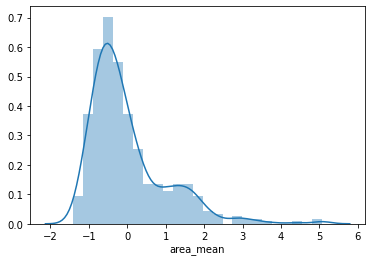

In [1665]:
# Distribution of area_mean

sns.distplot(X_train['area_mean'])

- There are lots of outliers towards the right

In [1666]:
upper_boundary = X_train['area_mean'].mean() + 3 * X_train['area_mean'].std()

upper_boundary

3.003302147394807

In [1667]:
lower_boundary = X_train['area_mean'].mean() - 3 * X_train['area_mean'].std()

lower_boundary

-3.003302147394807

In [1668]:
# Removing all the rows in the dataset with texture_mean greater than upper_boundary

X_train = X_train[ X_train['texture_mean'] < upper_boundary ]

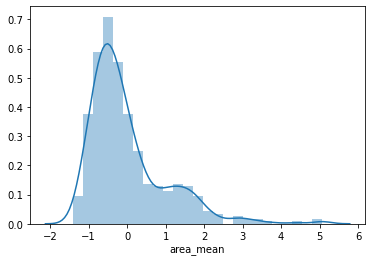

In [1669]:
# Distribution of area_mean after outlier treatment

sns.distplot(X_train['area_mean'])

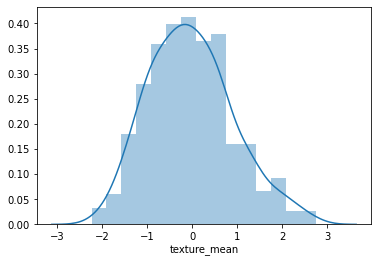

In [1670]:
# Distribution of texture_mean

sns.distplot(X_train['texture_mean'])

In [1671]:
upper_boundary = X_train['texture_mean'].mean() + 3 * X_train['texture_mean'].std()

upper_boundary

2.7989467947187583

In [1672]:
lower_boundary = X_train['texture_mean'].mean() - 3 * X_train['texture_mean'].std()

lower_boundary

-2.863072930148009

In [1673]:
# Removing all the rows in the dataset with texture_mean greater than upper_boundary

X_train = X_train[ X_train['texture_mean'] < upper_boundary ]

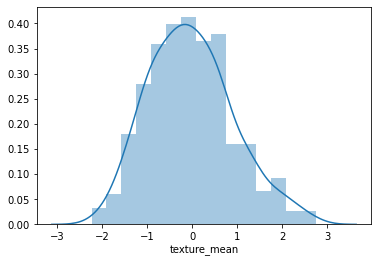

In [1674]:
# Distribution of area_mean after outlier treatment

sns.distplot(X_train['texture_mean'])

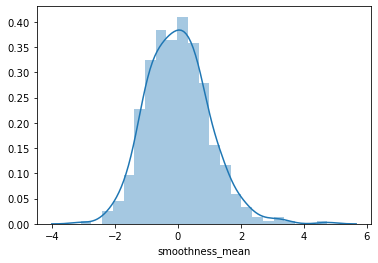

In [1675]:
# Distribution of smoothness_mean

sns.distplot(X_train['smoothness_mean'])

In [1676]:
upper_boundary = X_train['smoothness_mean'].mean() + 3 * X_train['smoothness_mean'].std()

upper_boundary

3.0097143206060433

In [1677]:
lower_boundary = X_train['smoothness_mean'].mean() - 3 * X_train['smoothness_mean'].std()

lower_boundary

-3.003736963495418

In [1678]:
# Removing all the rows in the dataset with smoothness_mean greater than upper_boundary

X_train = X_train[ X_train['smoothness_mean'] < upper_boundary ]

# Removing all the rows in the dataset with smoothness_mean lesser than lower_boundary

X_train = X_train[ X_train['smoothness_mean'] > lower_boundary ]

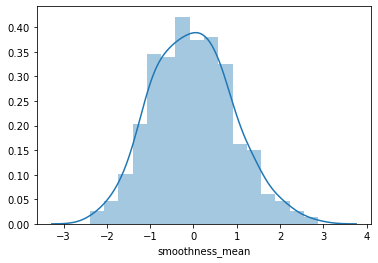

In [1679]:
# Distribution of smoothness_mean after outlier treatment

sns.distplot(X_train['smoothness_mean'])

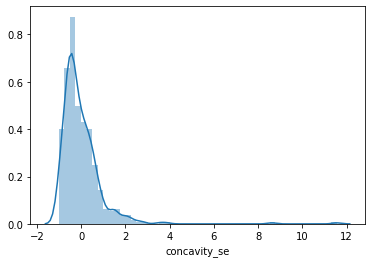

In [1680]:
# Distribution of concavity_se

sns.distplot(X_train['concavity_se'])

In [1681]:
IQR = X_train['concavity_se'].quantile(0.75) - X_train['concavity_se'].quantile(0.25)

upper_boundary = X_train['concavity_se'].quantile(0.75) + 1.5 * IQR

print("upper_boundary",upper_boundary)

lower_boundary = X_train['concavity_se'].quantile(0.25) - 1.5 * IQR

print("lower_boundary",lower_boundary)

upper_boundary 1.6071713612817224
lower_boundary -1.8274604036038318


In [1682]:
# Removing all the rows in the dataset with concavity_se greater than upper_boundary

X_train = X_train[ X_train['concavity_se'] < upper_boundary ]

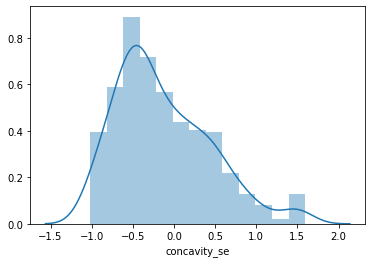

In [1683]:
# Distribution of concavity_se after outlier treatment

sns.distplot(X_train['concavity_se'])

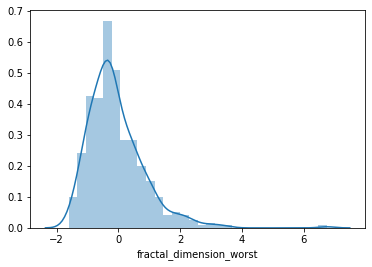

In [1684]:
# Distribution of fractal_dimension_worst

sns.distplot(X_train['fractal_dimension_worst'])

In [1685]:
upper_boundary = X_train['fractal_dimension_worst'].mean() + 3 * X_train['fractal_dimension_worst'].std()

upper_boundary

2.7047844948767827

In [1686]:
lower_boundary = X_train['fractal_dimension_worst'].mean() - 3 * X_train['fractal_dimension_worst'].std()

lower_boundary

-2.8506257300793334

In [1687]:
# Removing all the rows in the dataset with fractal_dimension_worst greater than upper_boundary

X_train = X_train[ X_train['fractal_dimension_worst'] < upper_boundary ]

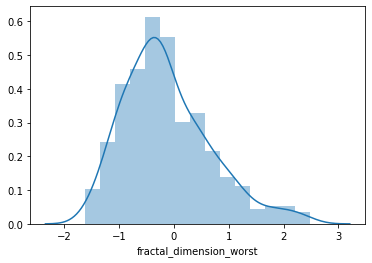

In [1688]:
# Distribution of fractal_dimension_worst after outlier treatment

sns.distplot(X_train['fractal_dimension_worst'])

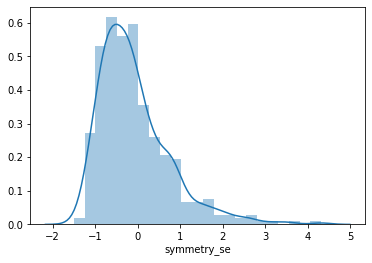

In [1689]:
# Distribution of symmetry_se

sns.distplot(X_train['symmetry_se'])

In [1690]:
upper_boundary = X_train['symmetry_se'].mean() + 3 * X_train['symmetry_se'].std()

upper_boundary

2.4343082741851774

In [1691]:
lower_boundary = X_train['symmetry_se'].mean() - 3 * X_train['symmetry_se'].std()

lower_boundary

-2.596902019445607

In [1692]:
# Removing all the rows in the dataset with symmetry_se greater than upper_boundary

X_train = X_train[ X_train['symmetry_se'] < upper_boundary ]

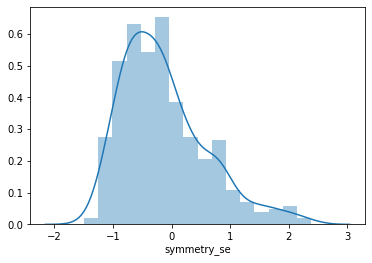

In [1693]:
# Distribution of symmetry_se after outlier treatment

sns.distplot(X_train['symmetry_se'])

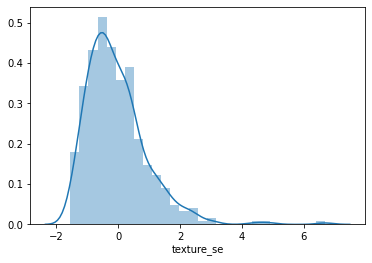

In [1694]:
# Distribution of texture_se before outlier treatment

sns.distplot(X_train['texture_se'])

In [1695]:
upper_boundary = X_train['texture_se'].mean() + 3 * X_train['texture_se'].std()

upper_boundary

2.9302642651722097

In [1696]:
lower_boundary = X_train['texture_se'].mean() - 3 * X_train['texture_se'].std()

lower_boundary

-3.0340431520085716

In [1697]:
# Removing all the rows in the dataset with texture_se greater than upper_boundary

X_train = X_train[ X_train['texture_se'] < upper_boundary ]

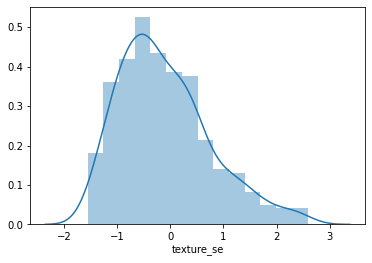

In [1698]:
# Distribution of texture_se after outlier treatment

sns.distplot(X_train['texture_se'])

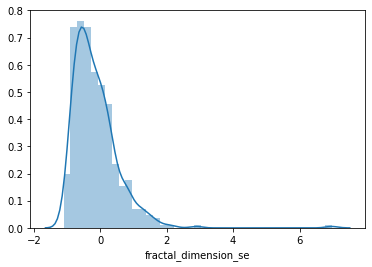

In [1699]:
# Distribution of fractal_dimension_se

sns.distplot(X_train['fractal_dimension_se'])

In [1700]:
IQR = X_train['fractal_dimension_se'].quantile(0.75) - X_train['fractal_dimension_se'].quantile(0.25)

upper_boundary = X_train['fractal_dimension_se'].quantile(0.75) + 1.5 * IQR

print("upper_boundary",upper_boundary)

lower_boundary = X_train['fractal_dimension_se'].quantile(0.25) - 1.5 * IQR

print("lower_boundary",lower_boundary)

upper_boundary 1.3167518630171393
lower_boundary -1.7688969597085635


In [1701]:
# Removing all the rows in the dataset with fractal_dimension_se greater than upper_boundary

X_train = X_train[ X_train['fractal_dimension_se'] < upper_boundary ]

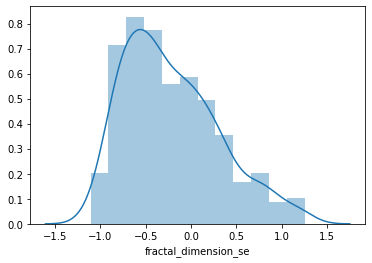

In [1702]:
# Distribution of fractal_dimension_se after outlier treatment

sns.distplot(X_train['fractal_dimension_se'])

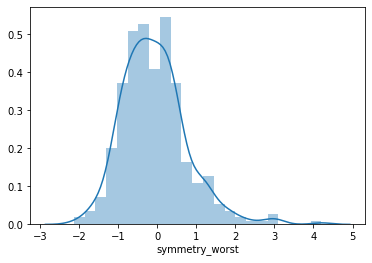

In [1703]:
# Distribution of symmetry_worst

sns.distplot(X_train['symmetry_worst'])

In [1704]:
upper_boundary = X_train['symmetry_worst'].mean() + 3 * X_train['symmetry_worst'].std()

lower_boundary = X_train['symmetry_worst'].mean() - 3 * X_train['symmetry_worst'].std()

print("upper_boundary - ",upper_boundary)

print("lower_boundary - ",lower_boundary)

upper_boundary -  2.45767926043269
lower_boundary -  -2.59419191602178


In [1705]:
# Removing all the rows in the dataset with symmetry_worst greater than upper_boundary

X_train = X_train[ X_train['symmetry_worst'] < upper_boundary ]

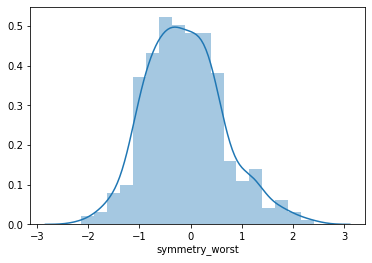

In [1706]:
# Distribution of symmetry_worst after outlier treatment

sns.distplot(X_train['symmetry_worst'])

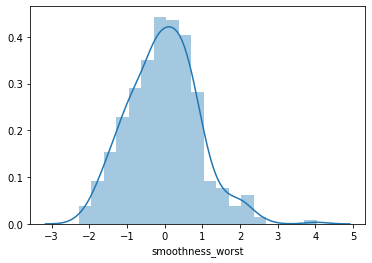

In [1707]:
# Distribution of smoothness_worst

sns.distplot(X_train['smoothness_worst'])

In [1708]:
upper_boundary = X_train['smoothness_worst'].mean() + 3 * X_train['smoothness_worst'].std()

lower_boundary = X_train['smoothness_worst'].mean() - 3 * X_train['smoothness_worst'].std()

print("upper_boundary - ",upper_boundary)

print("lower_boundary - ",lower_boundary)

upper_boundary -  2.7452415289188905
lower_boundary -  -2.8141367637028787


In [1709]:
# Removing all the rows in the dataset with smoothness_worst greater than upper_boundary

X_train = X_train[ X_train['smoothness_worst'] < upper_boundary ]

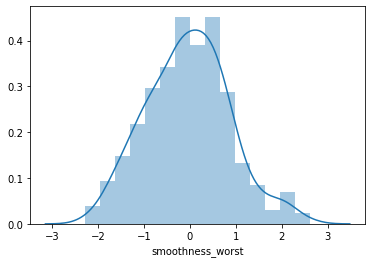

In [1710]:
# Distribution of smoothness_worst after outlier treatment

sns.distplot(X_train['smoothness_worst'])

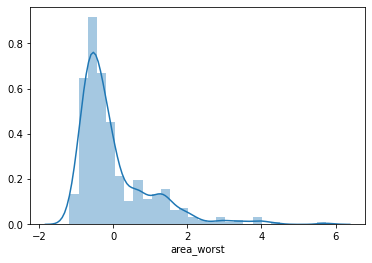

In [1711]:
# Distribution of area_worst

sns.distplot(X_train['area_worst'])

In [1712]:
upper_boundary = X_train['area_worst'].mean() + 3 * X_train['area_worst'].std()

lower_boundary = X_train['area_worst'].mean() - 3 * X_train['area_worst'].std()

print("upper_boundary - ",upper_boundary)

print("lower_boundary - ",lower_boundary)

upper_boundary -  2.99716838768444
lower_boundary -  -2.984558662738365


In [1713]:
# Removing all the rows in the dataset with area_worst greater than upper_boundary

X_train = X_train[ X_train['area_worst'] < upper_boundary ]

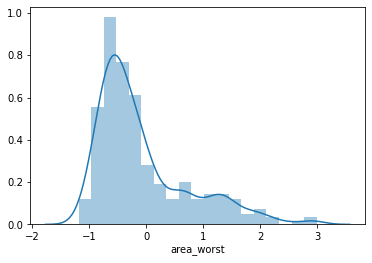

In [1714]:
# Distribution of area_worst after outlier treatment

sns.distplot(X_train['area_worst'])

In [1715]:
# After outlier treatment

X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,-0.040723,-0.086863,-0.050623,-0.060573,-0.066216,-0.169171,-0.175962,-0.116076,-0.119049,-0.164643,-0.118443,-0.099311,-0.124943,-0.113844,-0.082154,-0.219986,-0.189583,-0.141659,-0.164347,-0.217807,-0.056486,-0.076807,-0.065743,-0.076872,-0.054206,-0.158664,-0.167048,-0.107716,-0.118219,-0.172485
std,0.887425,0.919434,0.884529,0.841350,0.894647,0.845404,0.812110,0.884611,0.838270,0.755636,0.750334,0.866379,0.730586,0.597981,0.897150,0.668100,0.523486,0.834314,0.711783,0.524550,0.874014,0.912319,0.870858,0.814048,0.909270,0.820786,0.814324,0.916743,0.752508,0.755004
min,-1.972056,-2.242455,-1.934128,-1.411828,-2.395448,-1.627501,-1.108645,-1.255294,-2.359642,-1.805931,-1.006290,-1.555624,-1.010501,-0.685417,-1.420044,-1.299651,-1.018295,-1.952238,-1.497662,-1.110231,-1.683377,-2.236979,-1.659246,-1.188854,-2.281334,-1.425584,-1.303744,-1.748578,-2.139132,-1.613113
25%,-0.666515,-0.768133,-0.672016,-0.651676,-0.745555,-0.806110,-0.775180,-0.753469,-0.723326,-0.759530,-0.628131,-0.744515,-0.631744,-0.477691,-0.717258,-0.724070,-0.575086,-0.711130,-0.688826,-0.631453,-0.663252,-0.768255,-0.675481,-0.626948,-0.702657,-0.755408,-0.804076,-0.773619,-0.650478,-0.723528
50%,-0.199955,-0.162984,-0.231361,-0.290446,-0.102437,-0.362307,-0.454029,-0.466050,-0.144099,-0.232165,-0.368190,-0.256793,-0.345605,-0.355914,-0.310526,-0.402740,-0.325087,-0.243357,-0.274685,-0.314749,-0.273383,-0.113504,-0.292435,-0.340804,-0.055110,-0.349221,-0.382927,-0.346571,-0.162733,-0.289972
75%,0.410162,0.519269,0.424199,0.280424,0.525824,0.282826,0.240887,0.422427,0.417028,0.325731,0.130293,0.379049,0.112608,0.005675,0.339834,0.205030,0.154607,0.307357,0.181471,0.112896,0.346772,0.536374,0.409085,0.187228,0.512053,0.287505,0.336118,0.553134,0.337722,0.281161
max,3.063207,2.453878,3.195865,3.360096,2.881803,3.961096,3.044432,3.487880,2.809960,2.507353,3.398321,2.585367,3.553595,2.831680,3.560110,3.223057,1.593371,3.866969,2.384222,1.254179,2.774870,2.396648,3.053300,2.993183,2.615467,3.250280,2.995302,2.664810,2.158424,2.407834


In [1716]:
# X_train indices

X_train.index

Int64Index([476, 130, 246, 205,  16, 218,  33, 533, 310,  89,
            ...
             40, 477,   5, 110, 316, 552, 393,  75, 337, 523],
           dtype='int64', length=385)

In [1717]:
# Y_train indices

Y_train.index

Int64Index([476, 130, 246, 205,  16, 218, 212,  33, 533, 310,
            ...
             40, 477,   5, 110, 316, 552, 393,  75, 337, 523],
           dtype='int64', length=455)

In [1718]:
# Drop Y_train values which does not have corresponding X_train values

Y_train = Y_train.loc[X_train.index]

In [1719]:
# Y_train indices after dropping a few

Y_train.index

Int64Index([476, 130, 246, 205,  16, 218,  33, 533, 310,  89,
            ...
             40, 477,   5, 110, 316, 552, 393,  75, 337, 523],
           dtype='int64', length=385)

In [1720]:
Y_train['diagnosis'].value_counts()

B    253
M    132
Name: diagnosis, dtype: int64